In [14]:
import pandas as pd
# Load the dataset
house_prices_df = pd.read_csv('Housing.csv')
# Display the first few rows of the dataset
print(house_prices_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [15]:
house_prices_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(house_prices_df)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [30]:
# List of non-categorical columns
non_categorical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = df[non_categorical_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)



Correlation Matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


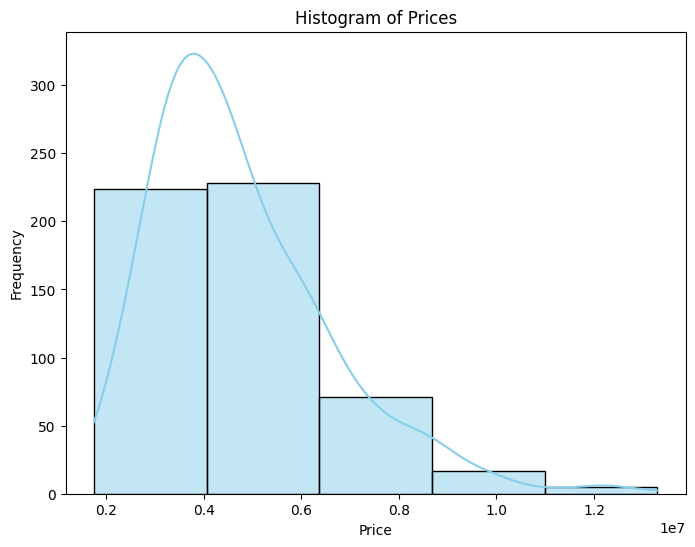

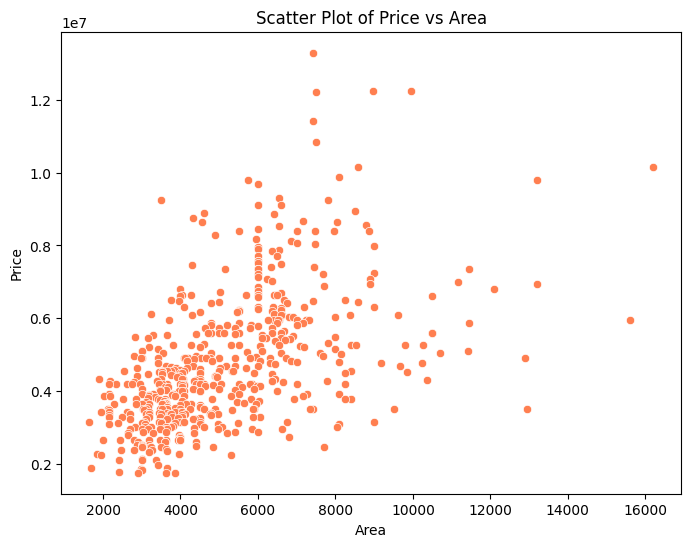

C:\Users\kumar\AppData\Local\Temp\ipykernel_12152\1290775567.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=house_prices_df, palette='pastel')


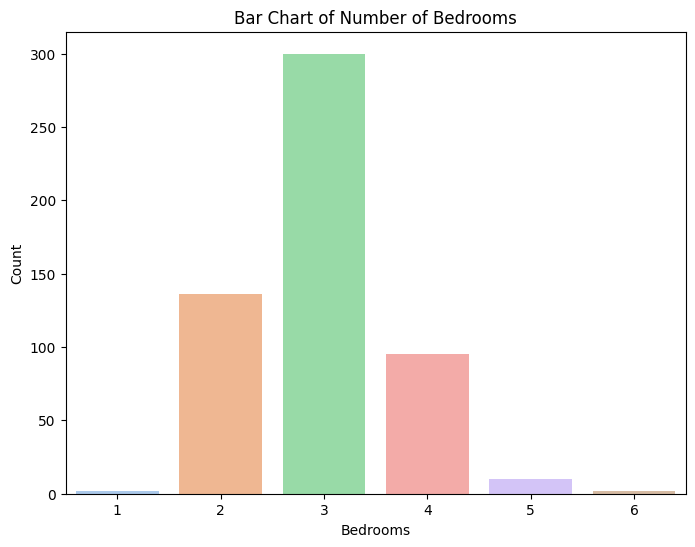

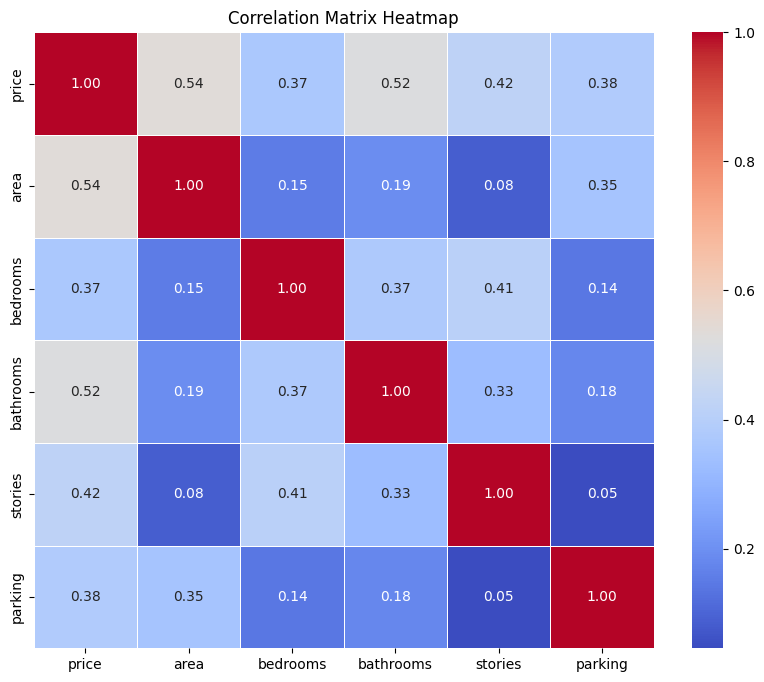

In [31]:

# Plotting a histogram of prices
plt.figure(figsize=(8, 6))
sns.histplot(house_prices_df['price'], bins=5, kde=True, color='skyblue')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting a scatter plot of price vs area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=house_prices_df, color='coral')
plt.title('Scatter Plot of Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Plotting a bar chart of number of bedrooms
plt.figure(figsize=(8, 6))
sns.countplot(x='bedrooms', data=house_prices_df, palette='pastel')
plt.title('Bar Chart of Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
